In [8]:
import pandas as pd
from joblib import load
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt

In [9]:
model = load('models/classifier.pkl')

print(type(model))

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [10]:
df2 = pd.read_csv('../synthetic_dataset.csv')

In [11]:
train_cols = [
    'Week', 'Line', 'Location', 'Vehicle',
    'Year', 'Month', 'Day_of_Month', 'Hour', 'Minute',
    'Bound_B', 'Bound_E', 'Bound_N', 'Bound_S', 'Bound_W'
]

In [12]:
y_true = df2['has_delay']
df2 = df2[train_cols]

In [13]:
predictions = model.predict(df2)
probabilidades = model.predict_proba(df2)[:, 1]

In [14]:
print("Confusion Matrix:")
print(confusion_matrix(y_true, predictions))

Confusion Matrix:
[[281  19]
 [ 98 202]]


In [15]:
print("\nClassification Report:")
print(classification_report(y_true, predictions))


Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.94      0.83       300
           1       0.91      0.67      0.78       300

    accuracy                           0.81       600
   macro avg       0.83      0.80      0.80       600
weighted avg       0.83      0.81      0.80       600




ROC AUC: 0.9028


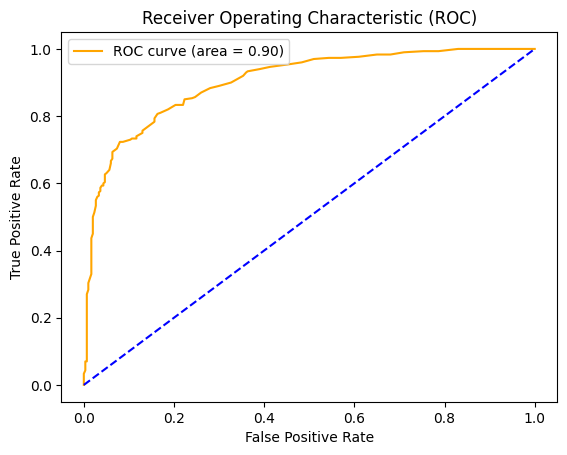

In [16]:
roc_auc = roc_auc_score(y_true, probabilidades)
print(f"\nROC AUC: {roc_auc:.4f}")

fpr, tpr, thresholds = roc_curve(y_true, probabilidades)
plt.figure()
plt.plot(fpr, tpr, color='orange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend()
plt.show()

In [17]:
accuracy = accuracy_score(y_true, predictions)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8050
